# Basic Usage with Backgrounds

Create an instance of PyFBU

In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import fbu
import uproot
import utils

np.random.seed(2018) # set the seed so that results are reproducible

In [3]:
myfbu = fbu.PyFBU()

Supply the input distribution to be unfolded as a 1-dimensional list for N bins, with each entry corresponding to the bin content.
Supply the response matrix where each row corresponds to a truth level bin.
The normalization of each row must be the acceptance efficiency of the corresponding bin (e.g. the normalization is 1 for resolution only unfolding).

In [8]:
f = uproot.open("../data/example.root")
data = f['data'].numpy
response = f['resmat'].numpy
bckg1 = f['bckg1'].numpy
bckg2 = f['bckg2'].numpy

# store backgrounds in dictionary
backgrounds = {'bckg1':bckg1[0].tolist(),
               'bckg2':bckg2[0].tolist()} # bin content for each background
backgrounds_systs = {'bckg1':0.,
                     'bckg2':0.}      # no uncertainties on background normalization

# data     = (array([100., 150., 160., 110.]),    # bin content
#             array([0., 1., 2., 3., 4.]))        # bin edges
# response = (array([[0.08, 0.06, 0.03, 0.02],    # first truth bin
#                    [0.01, 0.04, 0.07, 0.1 ]]),  # second truth bin
#            (array([0., 1., 2., 3., 4.]),        # x bin edges
#             array([0., 1., 2.])))               # y bin edges
# data[0]/response[0] >> bin content
# data[1]/response[1] >> bin edges

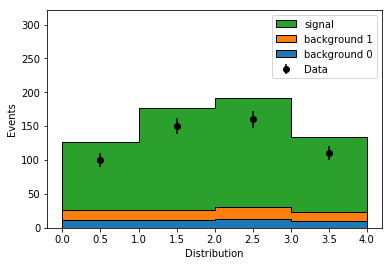

In [9]:
utils.plotYields(data[0].tolist(),
                 signal=data[0].tolist(),
                 backgrounds=[backgrounds[i] for i in backgrounds.keys()],
                 bins=data[1].tolist())

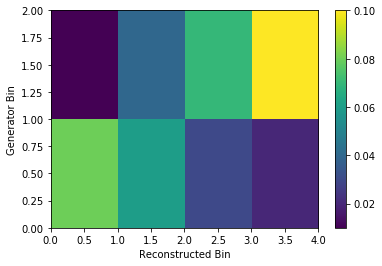

In [10]:
utils.plotResponseMatrix(response[0],bins=response[1])

Define the boundaries of the hyperbox to be sampled for each bin.
One or more backgrounds, with the corresponding normalization uncertainties (gaussian prior), can be taken into account in the unfolding procedure.

In [11]:
myfbu.data     = data[0].tolist()
myfbu.response = response[0].tolist()
myfbu.background     = backgrounds
myfbu.backgroundsyst = backgrounds_systs

myfbu.lower = [0,0]         # lower bound on hyperbox
myfbu.upper = [3000,3000]   # upper bound on hyperbox
myfbu.nMCMC = 200000        # number of samplings
myfbu.monitoring = False    # diagnostics

Run the MCMC sampling (this step might take up to several minutes for a large number of bins).

In [12]:
myfbu.run()

Assigned Metropolis to truth0
Assigned Metropolis to truth1
Assigned NUTS to gaus_bckg1
Assigned NUTS to gaus_bckg2
/Users/demarley/anaconda2/lib/python2.7/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 201000/201000 [02:38<00:00, 1264.87it/s]


Retrieve the N-dimensional posterior distribution in the form of a list of N arrays.

In [12]:
trace = myfbu.trace
print "> Trace = ",trace 
print "> Size of trace     = ",len(trace)
print "> Entries per trace = ",len(trace[0])

> Trace =  [array([728, 574, 723, ..., 803, 803, 803]), array([1097, 1097, 1184, ...,  908,  908,  908])]
> Size of trace     =  2
> Entries per trace =  500000


Each array corresponds to the projection of the posterior distribution for a given bin.

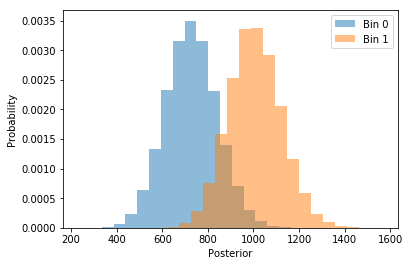

In [13]:
utils.plotPosteriors(trace)

For each unfolded bin, we can extract the mean and RMS.

In [14]:
utils.printPosteriors(trace)

 > Bin 0: 726.70 ± 113.65
 > Bin 1: 1006.16 ± 114.23


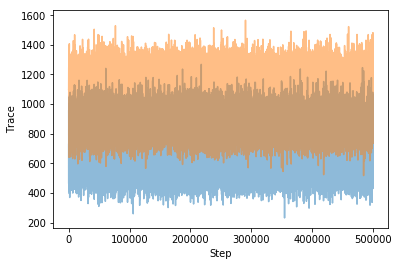

In [15]:
utils.plotTrace(trace)